# Superando o Índice Bovespa com Ações de Alto Desempenho

## Objetivo

Criar uma carteira de investimentos que supere o Índice Bovespa (Ibovespa) através da seleção de empresas com as maiores valorizações nos últimos seis meses.

## Hipótese

Empresas que demonstram forte crescimento em um período curto podem apresentar potencial de retornos acima da média do mercado no futuro próximo.

## Metodologia

- Utilizar dados de cotação fornecidos pelo Yahoo Finance para identificar as 10 empresas com o maior percentual de valorização ao longo dos últimos seis meses.
- Implementar uma estratégia de investimento mensal utilizando a seleção criada na etapa anterior, avaliando os retornos obtidos ao final de cada mês.
- Desenvolver um algoritmo de backtesting com o intuito de validar a hipótese, aplicando essa estratégia ao longo de um período de análise de 10 anos, especificamente de 01 de janeiro de 2013 a 31 de dezembro de 2023.

> A rentabilidade obtida no passado não representa garantia de rentabilidade futura. A rentabilidade divulgada não é líquida de impostos. As informações divulgadas neste material têm caráter meramente informativo e não constituem qualquer tipo de aconselhamento de investimentos, não devendo ser utilizadas com este propósito. As informações contidas nesse material são de caráter exclusivamente informativo. Os investidores não devem se basear nas informações aqui contidas sem buscar o aconselhamento de um profissional.

### O que é Backtesting?

Backtesting é uma técnica utilizada para avaliar a eficácia de estratégias de investimento, operações e setups por meio da análise de dados históricos do mercado. O termo "backtesting" se refere literalmente a um "teste retrospectivo", permitindo aos investidores simular a aplicação de suas estratégias em condições de mercado passadas para estimar como teriam performado. Este método é fundamental para identificar e aprimorar técnicas de investimento, oferecendo uma base para decisões mais informadas ao revelar como as estratégias teriam se comportado em diferentes cenários de mercado, usando informações reais do passado.

## Importando os módulo necessários

In [2]:
# Error message for the case of a library not being installed.
ERROR_MENSAGEM = """
A biblioteca {module_name} não está instalada.
Por favor, instale-a usando 'pip install {module_name}' antes de executar este notebook.
"""

In [3]:
# Import yfinance a downloader market data from Yahoo! Finance's API.
# https://github.com/ranaroussi/yfinance
try:
    import yfinance as yf
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [4]:
# Import Pandas a powerful data structures for data analysis,
# time series, and statistics.
# https://pandas.pydata.org
try:
    import pandas as pd
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [5]:
# Import NumPy a fundamental package for array computing in Python.
# https://numpy.org
try:
    import numpy as np
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name))

In [6]:
# Import QuantStats a portfolio analytics for quants.
# https://github.com/ranaroussi/quantstats
try:
    import quantstats as qs
except ImportError as error:
    print(ERROR_MENSAGEM.format(module_name=error.name)) 

## Composição ao Longo do Tempo da Carteira Teórica do Ibovespa

### O que é Índice Bovespa?

O Índice Bovespa, conhecido como Ibovespa, é o principal indicador de desempenho das ações negociadas na B3 (Brasil, Bolsa, Balcão), a bolsa de valores brasileira. Ele reflete a variação média das cotações dos ativos de maior liquidez e representatividade do mercado de ações brasileiro. O índice é composto por uma carteira teórica de ativos, selecionada de acordo com critérios específicos de liquidez e representatividade, e sua composição é revisada trimestralmente para se ajustar às mudanças do mercado.

O Ibovespa serve como um termômetro do mercado acionário brasileiro, oferecendo uma visão geral do comportamento das ações mais negociadas. Investidores e analistas utilizam o índice para avaliar a tendência do mercado como um todo, comparar o desempenho de seus investimentos e como referência para fundos de investimento e outros produtos financeiros que buscam seguir ou superar seu desempenho.


### Composição ao longo do tempo

- *Década de 90*: Predominância de empresas estatais e de commodities.
- *Anos 2000*: Aumento da participação de empresas privadas, especialmente dos setores financeiro e industrial.
- *Década de 2010*: Diversificação da carteira, com maior participação de empresas de setores como consumo, saúde e tecnologia.
- *Anos 2020*: Crescimento da representatividade de empresas de tecnologia e fintechs.

## Definindo Variáveis Globais

In [7]:
# Composition, over time, of the Ibovespa theoretical portfolio.
COMPOSITION_IBOVESPA_INDEX = [
    'ABEV3.SA', 'ACES4.SA', 'AEDU3.SA', 'AGEI3.SA', 'ALLL1.SA', 'ALLL3.SA', 'ALPA4.SA', 'AMBV4.SA',
    'AMER3.SA', 'ARCE3.SA', 'ARCE4.SA', 'ARCZ6.SA', 'ARZZ3.SA', 'ASAI3.SA', 'ATMP3.SA', 'AURE3.SA',
    'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBAS4.SA', 'BBDC3.SA', 'BBDC4.SA', 'BBSE3.SA', 'BEEF3.SA',
    'BESP4.SA', 'BIDI1.SA', 'BIDI11.SA', 'BIDI4.SA', 'BISA3.SA', 'BMT04.SA', 'BNCA3.SA', 'BPAC1.SA',
    'BPAC11.SA', 'BPAN4.SA', 'BRAP4.SA', 'BRDT4.SA', 'BRFS3.SA', 'BRKM5.SA', 'BRML3.SA', 'BRPR3.SA',
    'BRTP3.SA', 'BRTP4.SA', 'CASH3.SA', 'CCRO3.SA', 'CESP5.SA', 'CESP6.SA', 'CEVA4.SA', 'CGAS5.SA',
    'CIEL3.SA', 'CLSCA.SA', 'CMET4.SA', 'CMIG3.SA', 'CMIG4.SA', 'CMIN3.SA', 'COGN3.SA', 'CPFE3.SA',
    'CPLE6.SA', 'CPSL3.SA', 'CRFB3.SA', 'CRGT5.SA', 'CRTP5.SA', 'CRUZ3.SA', 'CSAN3.SA', 'CSIP6.SA',
    'CSNA3.SA', 'CSTB4.SA', 'CTIP3.SA', 'CVCB3.SA', 'CYRE3.SA', 'DASA3.SA', 'DURA4.SA', 'DXCO3.SA',
    'EBEN4.SA', 'EBTP3.SA', 'EBTP4.SA', 'ECOR3.SA', 'EGIE3.SA', 'ELET3.SA', 'ELET6.SA', 'ELPL4.SA',
    'EMAE4.SA', 'EMBR3.SA', 'EMBR4.SA', 'ENBR3.SA', 'ENEV3.SA', 'ENGI1.SA', 'ENGI11.SA', 'EPTE4.SA',
    'EQTL3.SA', 'ERIC4.SA', 'EVEN3.SA', 'EZTC3.SA', 'FIBR3.SA', 'FLRY3.SA', 'GEPA4.SA', 'GETI4.SA',
    'GETT1.SA', 'GETT11.SA', 'GFSA3.SA', 'GGBR4.SA', 'GNDI3.SA', 'GOAU4.SA', 'GOLL4.SA', 'HAPV3.SA',
    'HGTX3.SA', 'HYPE3.SA', 'IGTA3.SA', 'IGTI1.SA', 'IGTI11.SA', 'INEP4.SA', 'IRBR3.SA', 'ITSA4.SA',
    'ITUB4.SA', 'JBSS3.SA', 'JHSF3.SA', 'JPSA3.SA', 'KLBN1.SA', 'KLBN11.SA', 'KLBN4.SA', 'LAME4.SA',
    'LAND3.SA', 'LCAM3.SA', 'LIGT3.SA', 'LIPR3.SA', 'LOGG3.SA', 'LREN3.SA', 'LWSA3.SA', 'MGLU3.SA',
    'MMXM3.SA', 'MRFG3.SA', 'MRVE3.SA', 'MULT3.SA', 'NETC4.SA', 'NTCO3.SA', 'OGXP3.SA', 'OIBR3.SA',
    'OIBR4.SA', 'PALF3.SA', 'PCAR3.SA', 'PCAR4.SA', 'PDGR3.SA', 'PETR3.SA', 'PETR4.SA', 'PETZ3.SA',
    'PMAM4.SA', 'POMO4.SA', 'POS13.SA', 'POSI3.SA', 'PRIO3.SA', 'PRML3.SA', 'PRTX3.SA', 'PTIP4.SA',
    'QUAL3.SA', 'RADL3.SA', 'RAIL3.SA', 'RAIZ4.SA', 'RCTB3.SA', 'RCTB4.SA', 'RDCD3.SA', 'RDOR3.SA',
    'RENT3.SA', 'REPA4.SA', 'RLOG3.SA', 'RRRP3.SA', 'RSID3.SA', 'RUMO3.SA', 'SANB1.SA', 'SANB11.SA',
    'SAPR1.SA', 'SAPR11.SA', 'SBSP3.SA', 'SDIA4.SA', 'SHAP4.SA', 'SLCE3.SA', 'SMLS3.SA', 'SMTO3.SA',
    'SOMA3.SA', 'SUBA3.SA', 'SULA1.SA', 'SULA11.SA', 'SUZB3.SA', 'SUZB5.SA', 'SYNE3.SA', 'TAEE1.SA',
    'TAEE11.SA', 'TAMM4.SA', 'TBLE6.SA', 'TCOC4.SA', 'TCSL4.SA', 'TELB3.SA', 'TELB4.SA', 'TIMS3.SA',
    'TLCP4.SA', 'TMAR5.SA', 'TMAR6.SA', 'TMCP4.SA', 'TNEP4.SA', 'TNLP3.SA', 'TNLP4.SA', 'TOTS3.SA',
    'TPRC6.SA', 'TRJC6.SA', 'TRPL4.SA', 'TSEP4.SA', 'TSPC3.SA', 'TSPC6.SA', 'UBBR1.SA', 'UGPA3.SA',
    'UGPA4.SA', 'UNIP6.SA', 'USIM3.SA', 'USIM5.SA', 'USIM6.SA', 'VALE3.SA', 'VALE5.SA', 'VBBR3.SA',
    'VCPA4.SA', 'VIIA3.SA', 'VIVO3.SA', 'VIVO4.SA', 'VIVT3.SA', 'VIVT4.SA', 'VVAR1.SA', 'VVAR11.SA',
    'WEGE3.SA', 'WHMT3.SA', 'YDUQ3.SA', 'СТАХ4.SA']

# Theoretical portfolio weights used in the model.
PORTFOLIO_WEIGHT = [0.2, 0.2, 0.15, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05]

# Start date for the data download.
START_DATE = '2013-01-01'

# End date for the data download.
END_DATE = '2023-12-31'

## Definindo as Funções que Implementam o Algoritmo

In [8]:
def filter_tickers_no_nan_historical(data_frame: pd.DataFrame) -> pd.DataFrame:
    """
    Returns only the columns of a DataFrame that have no NaN values.

    Args:
        data_frame: The DataFrame to be filtered.

    Returns:
        A DataFrame with the columns without NaN values.
    """

    # Checks for NaN in each column.
    tickers_com_nan = data_frame.isnull().any(axis=0)

    # Returns only the columns without NaN values.
    return data_frame.loc[:, ~tickers_com_nan]


In [9]:
def calculate_theoretical_portfolio_returns(data_frame: pd.DataFrame,
                                            period: int = 1) -> pd.DataFrame:
    """
    Calculates the returns of the Ibovespa index over a specified period.

    Args:
        data_frame: DataFrame with the monthly Ibovespa index.
        period: Number of periods to calculate the return (default: 1).

    Returns:
        A DataFrame with the returns of the Ibovespa index.
    """

    # Calculates the returns.
    returns = data_frame.pct_change(period)

    # The .pct_change() method can, in some cases, return infinite (np.inf) or
    # negative infinite (-np.inf) values. These values are replaced with zero
    # using the replace method.
    returns.replace([np.inf, -np.inf, -1], 0, inplace=True)

    # Removes the first rows of the DataFrame, which contain NaN values.
    returns = returns.iloc[period:]
    
    return returns

In [10]:
def top_n_stocks(data_frame: pd.DataFrame,
                 coluna_retorno: str,
                 n: int) -> pd.DataFrame:
    """
    Finds the N stocks with the highest return in a specific column for each year.

    Args:
        data_frame: DataFrame with the stock information.
        column_return: Name of the column that contains the returns.
        n: Number of stocks to be returned.

    Returns:
        A DataFrame with the N stocks with the highest return for each year.
    """

    # Groups the data by year.
    grouped_df = data_frame.groupby('Date')

    # Creates an empty list to store the results.
    top_n_stocks = []

    # Iterates over each group (year).
    for date, group in grouped_df:
        # Applies the same logic to each group.
        top_n = group.drop(columns=['Date']).groupby('Ticker').last().reset_index()
        top_n = top_n.sort_values(by=coluna_retorno, ascending=False).head(n)
        top_n['Date'] = date
        top_n_stocks.append(top_n)

    # Concatenates the results into a single DataFrame
    top_n_stocks_df = pd.concat(top_n_stocks)

    return top_n_stocks_df[['Date', 'Ticker', coluna_retorno]]

In [22]:
def generate_theoretical_portfolio(data_frame: pd.DataFrame,
                                   return_column: str = 'Return',
                                   group_by: str = 'Date') -> dict:
    """
    Creates a theoretical portfolio dictionary grouped by a specified time period.

    The dictionary keys are time periods formatted as "MM-YYYY", and the values
    are DataFrames containing the ticker symbols and associated returns for that period.

    Args:
        data_frame: The DataFrame containing ticker data and returns.
        return_column: The name of the column containing return values (default: 'Return').
        group_by: The column to use for grouping data into time periods (default: 'Date').

    Returns:
        A dictionary representing the theoretical portfolio.
    """

    portfolio = {}

    for date, group in data_frame.groupby(group_by):
        portfolio[date] = group[['Ticker',
                                            return_column]]

    return portfolio

In [12]:
def calculate_average_annualized_return(data_frame: pd.DataFrame,
                                        group_by: str,
                                        column: str) -> pd.DataFrame:
    """
    Calculates the average return of a DataFrame.

    Args:
        data_frame: DataFrame with the returns.
        group_by: Column of the DataFrame to group the data by.
        column: Column of the DataFrame with the returns.

    Returns:
        A DataFrame with the average return calculated for each group.
    """

    # Adds month and year columns.
    data_frame[group_by] = data_frame['Date'].dt.year

    # Groups the data by year.
    grouped_df = data_frame.groupby(group_by)

    # Calculates the average return for each year.
    mean_returns = grouped_df.apply(lambda group: group[column].mean())

    # Renames the average return column.
    mean_returns.name = 'Return'

    return mean_returns.reset_index()

Obtendo os dados históricos das ações pertencentes à carteira teórica do Ibovespa, adotamos um intervalo de análise de 01/01/2013 a 31/12/2023. Durante esse período, é importante notar que algumas ações podem não ter cotações disponíveis ou podem não fazer parte do índice Bovespa, devido a variações na composição do índice ao longo do tempo.

In [13]:
# Downloading 10 years of adjusted closing prices from the theoretical
# Ibovespa portfolio.
theoretical_portfolio = yf.download(COMPOSITION_IBOVESPA_INDEX,
                                    start=START_DATE,
                                    end=END_DATE)['Adj Close']

[*********************100%%**********************]  227 of 228 completed

105 Failed downloads:
['TMAR6.SA', 'EBEN4.SA', 'REPA4.SA', 'TRJC6.SA', 'WHMT3.SA', 'ACES4.SA', 'EBTP3.SA', 'TCSL4.SA', 'TBLE6.SA', 'CRUZ3.SA', 'EBTP4.SA', 'BISA3.SA', 'CSTB4.SA', 'PTIP4.SA', 'BESP4.SA', 'SDIA4.SA', 'TAMM4.SA', 'GETI4.SA', 'CSIP6.SA', 'EPTE4.SA', 'SUZB5.SA', 'ALLL3.SA', 'TSEP4.SA', 'PRTX3.SA', 'BRTP3.SA', 'TMAR5.SA', 'TCOC4.SA', 'RUMO3.SA', 'CPSL3.SA', 'PMAM4.SA', 'ERIC4.SA', 'BRTP4.SA', 'CRTP5.SA', 'SHAP4.SA', 'TNLP4.SA', 'TNEP4.SA', 'TNLP3.SA', 'BBAS4.SA', 'TPRC6.SA', 'CEVA4.SA', 'VCPA4.SA', 'RDCD3.SA', 'AEDU3.SA', 'SUBA3.SA', 'DURA4.SA', 'TLCP4.SA', 'CRGT5.SA', 'AMBV4.SA', 'EMBR4.SA', 'CMET4.SA', 'NETC4.SA', 'UGPA4.SA', 'PALF3.SA', 'TMCP4.SA', 'ARCZ6.SA', 'BRDT4.SA', 'CTIP3.SA']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2013-01-01 -> 2023-12-31)')
[*********************100%%**********************]  227 of 228 completed['UBBR1.SA', 'CESP5.SA', 'GNDI3.SA', 'IGTI1.SA', 

## Reamostragem usando Down Sampling

Reamostragem usando _downsampling_ é uma técnica utilizada no processamento de séries temporais para reduzir a frequência dos dados. Essa abordagem envolve a seleção de pontos de dados em intervalos maiores, efetivamente diminuindo a quantidade de dados e a resolução temporal da série. O downsampling é especialmente útil em situações onde os dados de alta frequência não são necessários para análises específicas ou onde a redução na quantidade de dados pode ajudar a melhorar a eficiência computacional ou a simplificar modelos analíticos.

O processo de downsampling é uma parte crucial da preparação de dados em análise de séries temporais, especialmente quando se lida com conjuntos de dados muito grandes ou quando se está interessado em tendências de longo prazo em vez de flutuações de curto prazo. Ao reduzir a frequência dos dados, é possível focar nas características mais importantes da série temporal, facilitando a análise e a visualização.

In [14]:
# Resample our time series data to monthly data and select the last observation of the month.
monthly_theoretical_portfolio = theoretical_portfolio.resample('M').last()

# Fill existing NaN values with zeros.
monthly_theoretical_portfolio.fillna(0, inplace=True)

Calculando o retorno teórico das ações que integram o índice teórico do Ibovespa no período de 01/01/2013 até 31/12/2023, adotaremos uma abordagem que envolve três portfólios teóricos distintos para a análise de retorno: 1) retorno das ações calculado mensalmente, 2) retorno das ações calculado trimestralmente, e 3) retorno das ações calculado semestralmente.

In [15]:
# Calculates the returns of the Ibovespa Theoretical Portfolio for different periods.

# Ibovespa Theoretical Portfolio returns for monthly.
theoretical_portfolio_returns = \
    filter_tickers_no_nan_historical(
        calculate_theoretical_portfolio_returns(monthly_theoretical_portfolio))

# Ibovespa Theoretical Portfolio returns for quarterly.
theoretical_portfolio_returns_three_month = \
    filter_tickers_no_nan_historical(
        calculate_theoretical_portfolio_returns(monthly_theoretical_portfolio,
                                                period=3))

# Ibovespa Theoretical Portfolio returns for halfyear.
theoretical_portfolio_returns_six_month = \
    filter_tickers_no_nan_historical(
        calculate_theoretical_portfolio_returns(monthly_theoretical_portfolio,
                                                period=6))

In [16]:
# Define the timestamps for the theoretical portfolio returns.
portfolio_timestamps = monthly_theoretical_portfolio.index[6:]

In [17]:
returns_df = pd.melt(theoretical_portfolio_returns.reset_index(),
                     id_vars='Date',
                     var_name='Ticker',
                     value_name='Return')
returns_three_month_df = pd.melt(theoretical_portfolio_returns_three_month.reset_index(),
                                 id_vars='Date',
                                 var_name='Ticker',
                                 value_name='Return 3m')
returns_six_month_df = pd.melt(theoretical_portfolio_returns_six_month.reset_index(),
                               id_vars='Date',
                               var_name='Ticker',
                               value_name='Return 6m')

Nosso algoritmo de backtesting será aplicado somente após a conclusão do primeiro semestre, permitindo assim que nossas três carteiras teóricas sejam comparadas em períodos idênticos.

In [18]:
# Filters the DataFrames to contain only data from the start
# date of the six-month returns.
returns_df = returns_df[
    returns_df['Date'] >= str(returns_six_month_df[
        'Date'].iloc[0].date())]

returns_three_month_df = returns_three_month_df[
    returns_three_month_df['Date'] >= str(returns_six_month_df[
        'Date'].iloc[0].date())]

In [19]:
portfolio = pd.merge(returns_df, returns_three_month_df, on=['Date', 'Ticker'])
portfolio = pd.merge(portfolio, returns_six_month_df, on=['Date', 'Ticker'])

Selecionando as 10 empresas que apresentaram o maior percentual de valorização no último mês, trimestre e semestre.

In [20]:
top_ten_stocks_month = top_n_stocks(portfolio, 'Return', 10)
top_ten_stocks_three_month = top_n_stocks(portfolio, 'Return 3m', 10)
top_ten_stocks_six_month = top_n_stocks(portfolio, 'Return 6m', 10)

Calculando os retornos para cada intervalo de tempo nos diferentes cenários analisados.

In [23]:
month_returns = {date:
                 np.dot(data_frame['Return'], PORTFOLIO_WEIGHT) for
                 date, data_frame in generate_theoretical_portfolio(top_ten_stocks_month,
                                                                    return_column='Return').items()}

three_month_returns = {date:
                       np.dot(data_frame['Return 3m'], PORTFOLIO_WEIGHT) for
                       date, data_frame in generate_theoretical_portfolio(top_ten_stocks_three_month,
                                                                          return_column='Return 3m').items()}

six_month_returns = {date:
                     np.dot(data_frame['Return 6m'], PORTFOLIO_WEIGHT) for
                     date, data_frame in generate_theoretical_portfolio(top_ten_stocks_six_month,
                                                                        return_column='Return 6m').items()}

## Gerando Gráficos dos Retornos

### Retornos Mensais do Portfólio

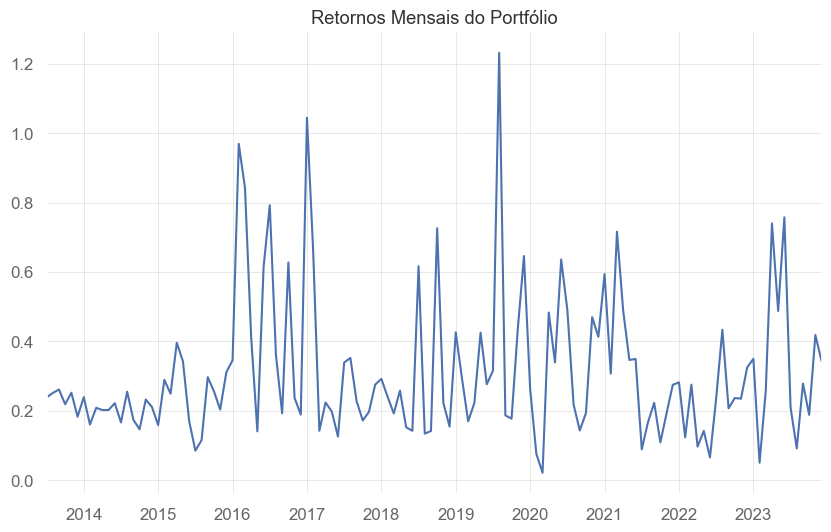

In [32]:
portfolio_month_returns = pd.DataFrame(index=month_returns.keys(),
                                       data=month_returns.values(),
                                       columns=['Return'])
portfolio_month_returns.plot(title='Retornos Mensais do Portfólio',
                             legend=False);

In [36]:
print(f'Retorno total do portfólio mensal: {portfolio_month_returns['Return'].sum():.2f}%')

Retorno total do portfólio mensal: 38.86%


### Retornos Trimestrais do Portfólio

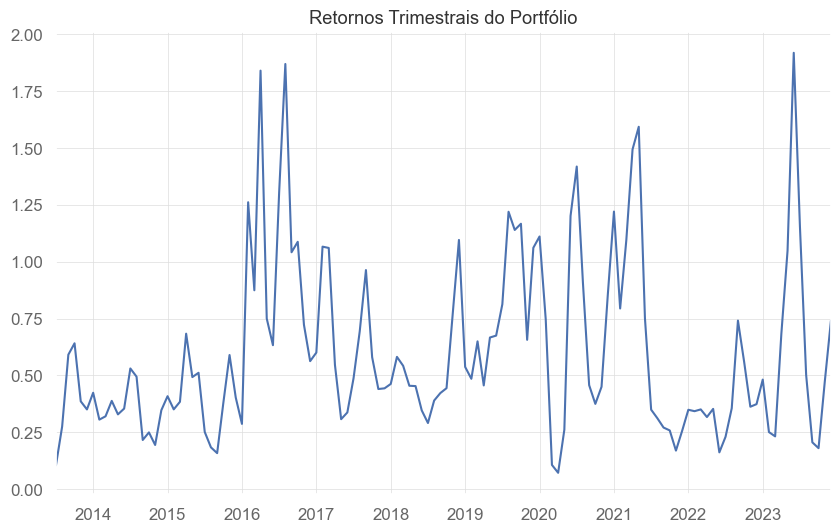

In [43]:
portfolio_three_month_returns = pd.DataFrame(index=three_month_returns.keys(),
                                             data=three_month_returns.values(),
                                             columns=['Return'])
portfolio_three_month_returns.plot(title='Retornos Trimestrais do Portfólio',
                                   legend=False);

In [42]:
print(f'Retorno total do portfólio trimestral: {portfolio_three_month_returns['Return'].sum():.2f}%')

Retorno total do portfólio trimestral: 75.71%


### Retornos Semestrais do Portfólio

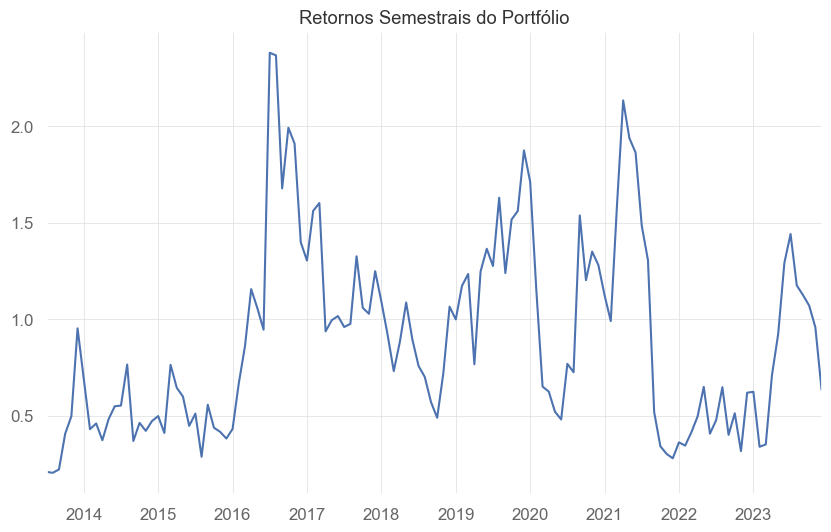

In [40]:
portfolio_six_month_returns = pd.DataFrame(index=six_month_returns.keys(),
                                           data=six_month_returns.values(),
                                           columns=['Return'])
portfolio_six_month_returns.plot(title='Retornos Semestrais do Portfólio',
                                 legend=False);

In [41]:
print(f'Retorno total do portfólio semestral: {portfolio_six_month_returns['Return'].sum():.2f}%')

Retorno total do portfólio semestral: 113.45%


## Conduzindo Análises de Benchmarking

In [44]:
# Download 10 years of adjusted closing prices for the Ibovespa index.
ibovespa_index = yf.download('^BVSP', start=START_DATE, end=END_DATE)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [78]:
returns_ibovespa_index = calculate_theoretical_portfolio_returns(ibovespa_index)

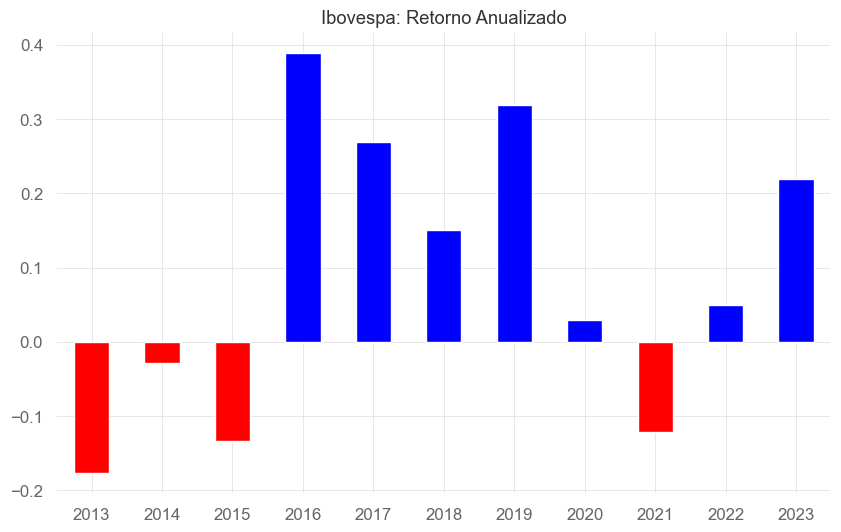

In [79]:
# Calcula o retorno médio ibovespa para cada ano.
returns_ibovespa_index = returns_ibovespa_index \
    .resample('Y').apply(lambda returns: (1 + returns).prod() - 1)
returns_ibovespa_index = returns_ibovespa_index.reset_index()
returns_ibovespa_index.rename(columns={'Adj Close': 'Return'},
                              inplace=True)
returns_ibovespa_index['Date'] = returns_ibovespa_index['Date'].dt.year

# Adiciona uma coluna para indicar se o retorno é positivo ou negativo.
returns_ibovespa_index['colormap'] = returns_ibovespa_index['Return'] > 0

returns_ibovespa_index.plot(x='Date',
                            y='Return',
                            kind='bar',
                            legend=False,
                            xlabel='',
                            rot=0,
                            color=returns_ibovespa_index['colormap'].map({True: 'blue',
                                                                          False: 'red'}),
                                 title='Ibovespa: Retorno Anualizado');

In [71]:
print(f'Retorno total do índice Ibovespa: {(returns_ibovespa_index['Return'].sum()*100):.2f}%')

Retorno total do índice Ibovespa: 96.55%


## Conclusão

A estratégia de selecionar empresas com as maiores valorizações nos últimos seis meses e implementar uma abordagem de investimento mensal, avaliando os retornos ao final de cada mês, tem potencial para superar o Índice Bovespa. Isso se baseia na hipótese de que empresas com forte crescimento em um período curto podem continuar a apresentar desempenho superior no futuro próximo. O uso do backtesting, aplicando esta estratégia ao longo de um período significativo (de 2013 a 2023), é uma metodologia sólida para testar a viabilidade da estratégia, permitindo uma análise detalhada de como essa abordagem teria se comportado sob diversas condições de mercado.